In [82]:
#Importing all major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [54]:
df = pd.read_csv("911.csv")

In [55]:
df.head() #check head of dataframe

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [56]:
df.info() # to check infrormation of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [57]:
df.shape # to quickly check how many rows and column the data have

(663522, 9)

# 1. Which are the top 5 zip codes that are recurring

In [58]:
df['zip'].value_counts().head(5) #sql(select zip_code from nine order by count(zip_code) desc limit 5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

# 2. Which are the top 3 Town that are reaching to 911

In [59]:
df['twp'].value_counts().head(3) 

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
Name: twp, dtype: int64

# 3.Unique reasons to call 911

In [60]:
df['title'].nunique()

148

# 4. Top 5 specific reasons to call 911

In [61]:
df['title'].apply(lambda title:title.split(':')[0])

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: title, Length: 663522, dtype: object

This code is using the apply method on a Pandas DataFrame column called 'title'. The method applies a lambda function to each element in the column, which splits the element (assumed to be a string) by the colon (':') character, and returns the first element of the resulting list. This is effectively extracting the text before the first colon in each 'title' value.

In [62]:
df['SpecificReasons'] = df['title'].apply(lambda title: title.split(':')[1])

In [63]:
df['SpecificReasons']

0           BACK PAINS/INJURY
1          DIABETIC EMERGENCY
2               GAS-ODOR/LEAK
3           CARDIAC EMERGENCY
4                   DIZZINESS
                 ...         
663517     VEHICLE ACCIDENT -
663518       GENERAL WEAKNESS
663519       VEHICLE ACCIDENT
663520          BUILDING FIRE
663521     VEHICLE ACCIDENT -
Name: SpecificReasons, Length: 663522, dtype: object

In [64]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [65]:
df['SpecificReasons'].value_counts().head(5)

 VEHICLE ACCIDENT -    148372
 DISABLED VEHICLE -     47909
 FIRE ALARM             38452
 VEHICLE ACCIDENT       36377
 FALL VICTIM            34683
Name: SpecificReasons, dtype: int64

In [66]:
df['Category_SpecificReasons'] = df['title'].apply(lambda title: title.split(':')[0])

In [67]:
df['Category_SpecificReasons'] 

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Category_SpecificReasons, Length: 663522, dtype: object

In [68]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReasons,Category_SpecificReasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [69]:
df['Category_SpecificReasons'].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: Category_SpecificReasons, dtype: int64

<AxesSubplot:xlabel='Category_SpecificReasons', ylabel='count'>

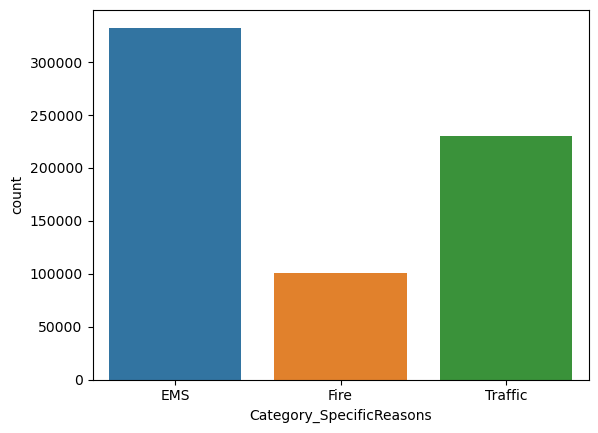

In [70]:
#plot a count plot for Category_SpecificReasons
sns.countplot(x='Category_SpecificReasons',data=df)

## Working with date time of python

In [71]:
#convert timestamp from obj to acutal timestamp
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   lat                       663522 non-null  float64       
 1   lng                       663522 non-null  float64       
 2   desc                      663522 non-null  object        
 3   zip                       583323 non-null  float64       
 4   title                     663522 non-null  object        
 5   timeStamp                 663522 non-null  datetime64[ns]
 6   twp                       663229 non-null  object        
 7   addr                      663522 non-null  object        
 8   e                         663522 non-null  int64         
 9   SpecificReasons           663522 non-null  object        
 10  Category_SpecificReasons  663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usag

In [73]:
# now it converted to datetime from object

In [74]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [75]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## 5.Create column for hour,month and day of the week

In [76]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [77]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReasons,Category_SpecificReasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3


# # Group the data by Days and months

In [78]:
df['Day'].nunique()

7

In [79]:
df['Hour'].nunique()

24

In [80]:
df['Month'].nunique()

12

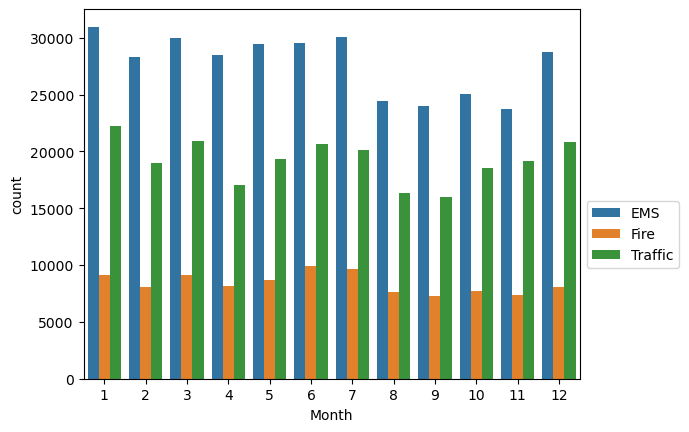

In [85]:
#plot a graph for a month
sns.countplot(x='Month',data=df,hue='Category_SpecificReasons')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))


In [86]:
#use group_by
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReasons,Category_SpecificReasons,Hour,Day
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

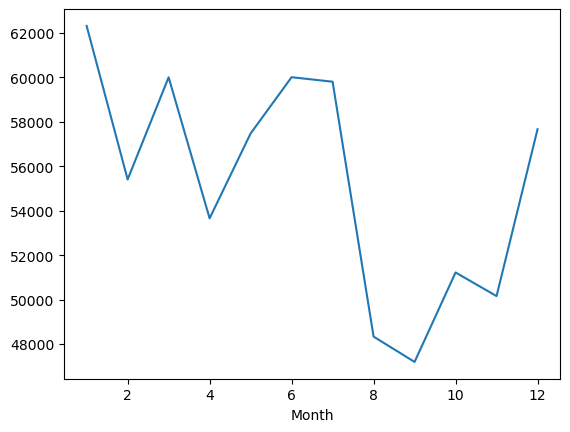

In [87]:
byMonth['twp'].plot()

In [88]:
#use group_by
byDay = df.groupby('Day').count()
byDay.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReasons,Category_SpecificReasons,Hour,Month
Day,,,,,,,,,,,,,
0,96745,96745,96745,85271,96745,96745,96707,96745,96745,96745,96745,96745,96745
1,97684,97684,97684,85911,97684,97684,97637,97684,97684,97684,97684,97684,97684
2,99157,99157,99157,87589,99157,99157,99111,99157,99157,99157,99157,99157,99157
3,98683,98683,98683,86792,98683,98683,98652,98683,98683,98683,98683,98683,98683
4,102942,102942,102942,90348,102942,102942,102895,102942,102942,102942,102942,102942,102942


<AxesSubplot:xlabel='Day'>

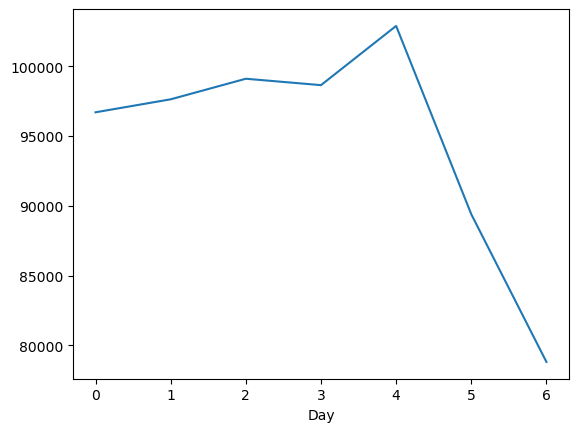

In [89]:
byDay['twp'].plot()